In [ ]:
# datasets
import kagglehub
ciplab_real_and_fake_face_detection_path = kagglehub.dataset_download('ciplab/real-and-fake-face-detection')

print('Data source import complete.')


100%|██████████| 431M/431M [00:20<00:00, 22.0MB/s]

Extracting files...


Data source import complete.


In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator


## DataFrame Making for the Data
*Content of the Datafarme***
1. Col Paths 'Image Absolute Path'
2. Col Real '1 if Real, 0 if Fake

In [ ]:
# load real vs fake data
real_path = os.path.join(ciplab_real_and_fake_face_detection_path, 'real_and_fake_face', 'training_real')
fake_path = os.path.join(ciplab_real_and_fake_face_detection_path, 'real_and_fake_face', 'training_fake')

# Store Image's Path and Labels
def load_image_paths_labels(folder_path, label):
    image_paths = []
    labels = []
    for file in os.listdir(folder_path):
        image_paths.append(os.path.join(folder_path, file))
        labels.append(label)
    return image_paths, labels

# real as 1, fake as 0
real_paths, real_labels = load_image_paths_labels(real_path, '1') # Store Real Images
fake_paths, fake_labels = load_image_paths_labels(fake_path, '0') # Store Fake Images

image_paths = real_paths + fake_paths # Merge Real & Fake Paths
labels = real_labels + fake_labels # Merge Real & Fake Labels

RealDf = pd.DataFrame({'Paths': real_paths, 'Labels':real_labels})
FakeDf = pd.DataFrame({'Paths': fake_paths, 'Labels':fake_labels})
MeregedDf = pd.DataFrame({'Paths': image_paths, 'Real':labels})

## Exploreing the Data

Real Data:                                                Paths Labels
0  /root/.cache/kagglehub/datasets/ciplab/real-an...      1
1  /root/.cache/kagglehub/datasets/ciplab/real-an...      1
2  /root/.cache/kagglehub/datasets/ciplab/real-an...      1
3  /root/.cache/kagglehub/datasets/ciplab/real-an...      1
4  /root/.cache/kagglehub/datasets/ciplab/real-an...      1
Real Data Size : (1081, 2)
--------------------------------------------------------------------------------------------------
Fake Data:                                                Paths Labels
0  /root/.cache/kagglehub/datasets/ciplab/real-an...      0
1  /root/.cache/kagglehub/datasets/ciplab/real-an...      0
2  /root/.cache/kagglehub/datasets/ciplab/real-an...      0
3  /root/.cache/kagglehub/datasets/ciplab/real-an...      0
4  /root/.cache/kagglehub/datasets/ciplab/real-an...      0
Fake Data Size: (960, 2)
--------------------------------------------------------------------------------------------------
Mereged 

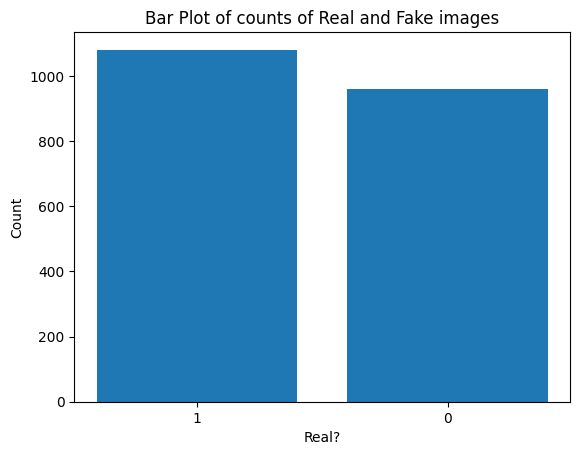

In [ ]:
#count data
print(f"Real Data: {RealDf.head()}")
print(f"Real Data Size : {RealDf.shape}")
print("-"*98)
print(f"Fake Data: {FakeDf.head()}")
print(f"Fake Data Size: {FakeDf.shape}")
print("-"*98)
print(f"Mereged Data: {MeregedDf.head()}")
print(f"Mereged Data Size: {MeregedDf.shape}")
print("-"*98)

#visual
value_counts = MeregedDf.value_counts('Real')
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Real?')
plt.ylabel('Count')
plt.title('Bar Plot of counts of Real and Fake images')
plt.xticks([0,1])
plt.show()

## Flatten & Normlize the Images
*Flatten the Images："Convert it from Matrix to Array of Values"*

*Normalize the Image "Convert Values to Be from 0 to 1"*

In [ ]:
# reshape to 128; make images array of 0 to 1.
def ProcessingImage(path, target_size=(128, 128), color_mode='rgb'):
    img = load_img(path, color_mode = color_mode, target_size=target_size)
    img_array = img_to_array(img)
    img_array = img_array/255.0
    return img_array

MeregedDf['image'] = MeregedDf['Paths'].apply(ProcessingImage)

## Divide the Data to Training Data & Testing Data
1. Training Data are 80% of Data
2. Testing Data are 20% of Data

In [ ]:
# 80% train, 20% test
TrainDf, TestDf = train_test_split(MeregedDf, test_size=0.2, stratify=MeregedDf['Real'], random_state = 123)

XTrain = np.stack(TrainDf['image'].values)
YTrain = TrainDf['Real'].values
XTest = np.stack(TestDf['image'].values)
YTest = TestDf['Real'].values

## The Models Making Using CNNs
*Model 1*
1. Using SGD Optimizier

*Model 2*
1. Using ADAM Optimizier

*Model 1 & Model 2 are Using 6 Layers Arranged as*
1. Conv2D
2. MaxPooling 2D
3. Conv2D
4. MaxPooling 2D
5. Flatten  *It Is Not a Layer*
6. Relu "Activation Function"
7. Sigmoid "Activation Function" *Output Layer*

In [ ]:
#Adam and SGD initialize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD

def modelSGD():
    model = Sequential()
    model.add(Conv2D(filters = 32, kernel_size = (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(128, 128, 3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters = 64, kernel_size = (3,3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(256, activation = 'relu', kernel_initializer = 'he_uniform'))
    model.add(Dense(1, activation = 'sigmoid'))
    opt = SGD(learning_rate=0.0001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

def modelADAM():
    model = Sequential()
    model.add(Conv2D(filters = 32, kernel_size = (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(128, 128, 3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters = 64, kernel_size = (3,3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(256, activation = 'relu', kernel_initializer = 'he_uniform'))
    model.add(Dense(1, activation = 'sigmoid'))
    opt = Adam(learning_rate=0.0001)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

## Plotting the Performance Result the Model

In [ ]:
# evaluate with loss and accuracy
def eval(results, model):
    plt.subplot(211)
    plt.subplots_adjust(hspace=0.4)
    plt.title('Cross Entropy Loss')
    plt.plot(results.history['loss'], color='blue', label='train')
    plt.plot(results.history['val_loss'], color='orange', label='test')
    plt.legend()
    plt.subplot(212)
    plt.title('Accuracy')
    plt.plot(results.history['accuracy'], color='blue', label='train')
    plt.plot(results.history['val_accuracy'], color='orange', label='test')
    plt.xlabel('Epoch')
    plt.legend()
    loss, acc = model.evaluate(XTest, YTest, verbose=0)
    print('Cross Entropy Loss: %.2f' % loss)
    print('Validation Accuracy: %.2f%%' % (acc * 100.0))

## Analysis of the Model Performance
*Using*
1. Recall
2. Percision
3. Confusion Matrix
4. Accuerrcy

In [ ]:
#analysis functions
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score

def Analysis(true_labels, predicted_labels):
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)

    metrics = ['Accuracy', 'Precision', 'Recall']
    scores = [accuracy, precision, recall]

    plt.bar(metrics, scores)

    for i, score in enumerate(scores):
        plt.text(i, score+0.02, f'{score:.2f}', ha='center', va='bottom', fontsize = 10)

    plt.ylim(0,1.1)
    plt.title('Accuracy, Precision and Recall Scores')
    plt.show()

    conf = confusion_matrix(true_labels, predicted_labels)
    labels = ['Real', 'Fake']

    conf_mat = ConfusionMatrixDisplay(conf, display_labels=labels)

    fig, ax = plt.subplots(figsize=(8, 6))
    conf_mat.plot(ax=ax, cmap=plt.cm.Blues, values_format='.0f')
    plt.show()

## Visual Sample of the Exsits Images with
1. Real Class
2. Expected Class

In [ ]:
#visualize
def VisualImages(Labels):
    indices = np.random.choice(len(XTest), 10)

    disp_img = XTest[indices]
    disp_img_lab = YTest[indices]

    fig, axes = plt.subplots(nrows=2, ncols = 5, figsize = (15,8))
    fig.suptitle('Images with their Predicted and Actual Labels', fontsize=20)

    for i, ax in enumerate(axes.flat):
        ax.imshow(disp_img[i])
        ax.axis('off')

        actual_label = 'Real' if disp_img_lab[i] == 1 else 'Fake'
        predicted_label = 'Real' if Labels[i] == 1 else 'Fake'
        ax.set_title('Actual: ' +actual_label +'\n' + 'Predicted: ' + predicted_label)

    plt.tight_layout()
    plt.show()

# Models Testing
## Model 1 "SGD"

In [ ]:
#train sgd
YTrain = YTrain.astype(np.float32)
YTest = YTest.astype(np.float32)
model1 = modelSGD()
model1.summary()
history1 = model1.fit(XTrain, YTrain, epochs=20, batch_size=32, validation_data=(XTest, YTest))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      14,745,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,765,505 (56.33 MB)

 Trainable params: 14,765,505 (56.33 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.4949 - loss: 0.7130 - val_accuracy: 0.5355 - val_loss: 0.6982
Epoch 2/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5459 - loss: 0.6844 - val_accuracy: 0.5012 - val_loss: 0.6892
Epoch 3/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5854 - loss: 0.6674 - val_accuracy: 0.5403 - val_loss: 0.6830
Epoch 4/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6328 - loss: 0.6516 - val_accuracy: 0.5159 - val_loss: 0.6895
Epoch 5/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6290 - loss: 0.6512 - val_accuracy: 0.5550 - val_loss: 0.6845
Epoch 6/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6357 - loss: 0.6414 - val_accuracy: 0.5648 - val_loss: 0.6797
Epoch 7/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6454 - loss: 0.6363 - val_accuracy: 0.5159 - val_loss: 0.7010
Epoch 8/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6209 - loss: 0.6427 - val_accuracy: 0.5550 - val_loss

Using SDG Optmizier
Cross Entropy Loss: 0.67
Validation Accuracy: 59.17%


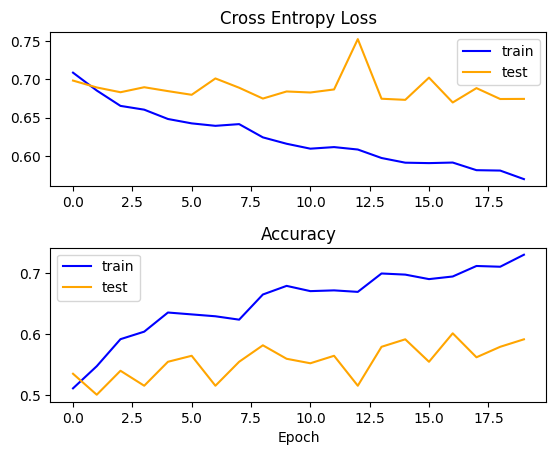

In [ ]:
#evaluate
print("Using SDG Optmizier")
eval(history1, model1)

In [ ]:
#result to matrix 0 to 1
SGDPredictions = model1.predict(XTest)
SGDPredictedLabels = np.round(SGDPredictions).flatten().astype(int)
SGDTrueLabels = np.round(YTest).flatten().astype(int)
print(SGDPredictedLabels)
print(SGDTrueLabels)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
[0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0
 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1
 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 1 0 0 1
 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1
 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1
 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0
 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1
 1 0]
[1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0
 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 1

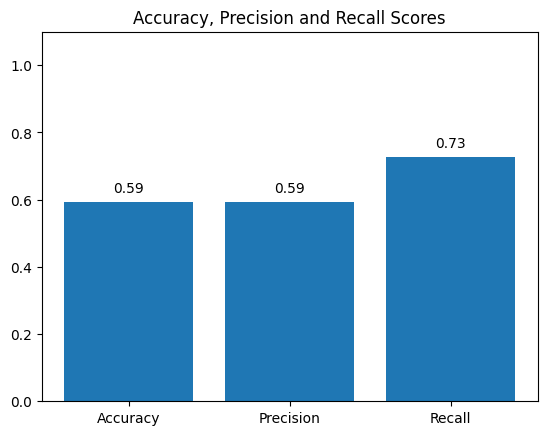

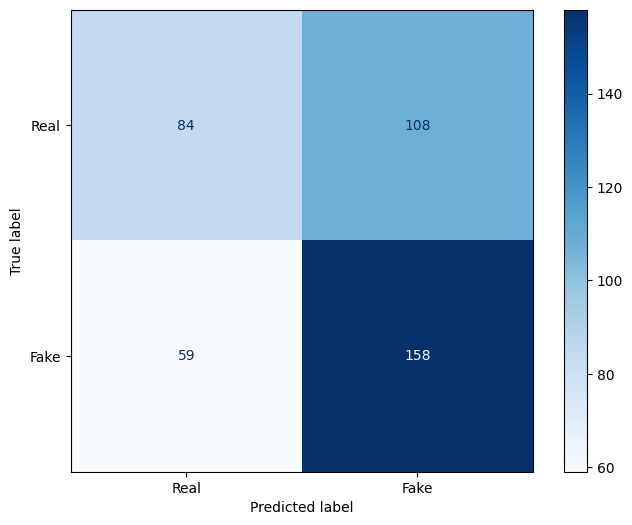

In [ ]:
#analyze results
Analysis(SGDTrueLabels,SGDPredictedLabels)

#precision：predicted real and actually real
#recall：total predicted as real
#accuracy：correctly predicted real and fake

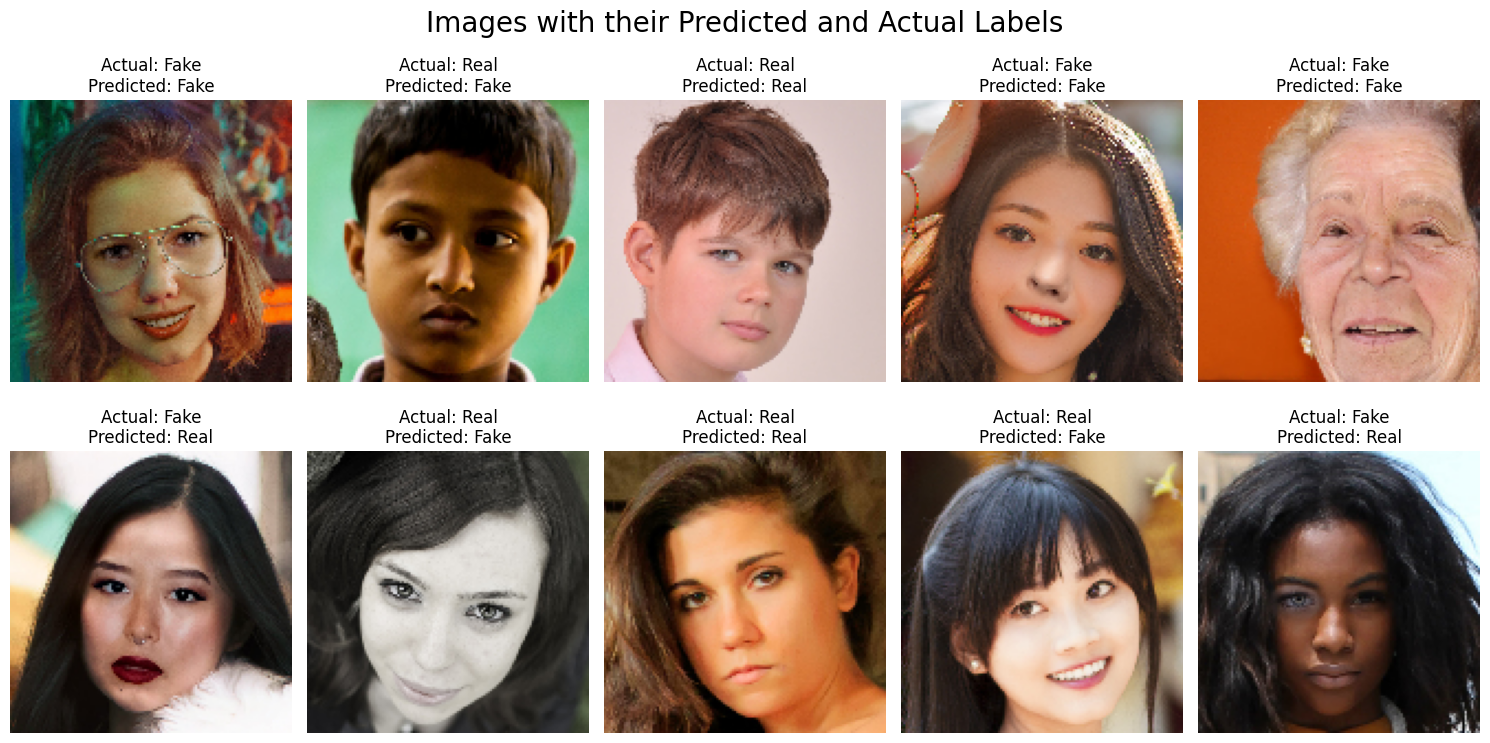

In [ ]:
#A few examples
VisualImages(SGDPredictedLabels)

## Model 2 "ADAM"

In [ ]:
model2 = modelADAM()
model2.summary()
history2 = model2.fit(XTrain, YTrain, epochs=20, batch_size=32, validation_data=(XTest, YTest))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │      14,745,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,765,505 (56.33 MB)

 Trainable params: 14,765,505 (56.33 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.4992 - loss: 1.1705 - val_accuracy: 0.5770 - val_loss: 0.6789
Epoch 2/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6272 - loss: 0.6491 - val_accuracy: 0.4694 - val_loss: 0.9898
Epoch 3/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5528 - loss: 0.7799 - val_accuracy: 0.5403 - val_loss: 0.7301
Epoch 4/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6882 - loss: 0.5724 - val_accuracy: 0.6112 - val_loss: 0.6983
Epoch 5/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7821 - loss: 0.4838 - val_accuracy: 0.5868 - val_loss: 0.7843
Epoch 6/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7640 - loss: 0.4757 - val_accuracy: 0.5795 - val_loss: 0.7119
Epoch 7/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8008 - loss: 0.4210 - val_accuracy: 0.5917 - val_loss: 0.7218
Epoch 8/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8735 - loss: 0.3545 - val_accuracy: 0.6064 - val_loss

Using ADAM Optmizier
Cross Entropy Loss: 1.10
Validation Accuracy: 60.15%


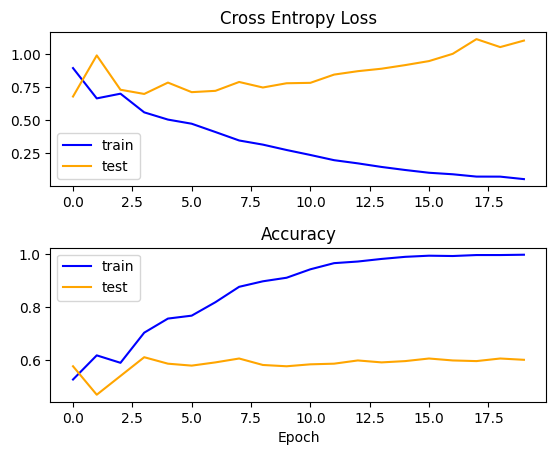

In [ ]:
print("Using ADAM Optmizier")
eval(history2, model2)

In [ ]:
ADAMPredictions = model2.predict(XTest)
ADAMPredictedLabels = np.round(ADAMPredictions).flatten().astype(int)
ADAMTrueLabels = np.round(YTest).flatten().astype(int)
print(ADAMPredictedLabels[:10])
print(ADAMTrueLabels[:10])

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[1 0 1 0 0 0 0 1 0 1]
[1 1 1 0 1 1 0 0 0 0]


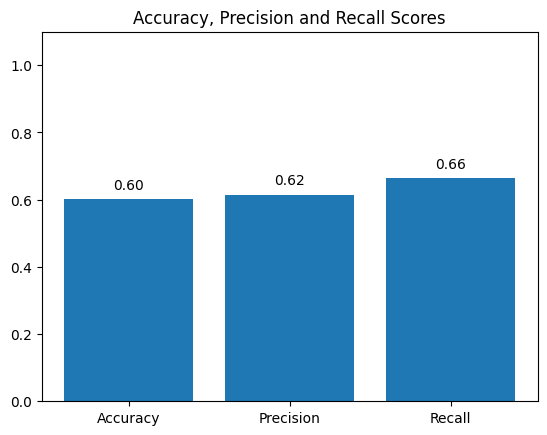

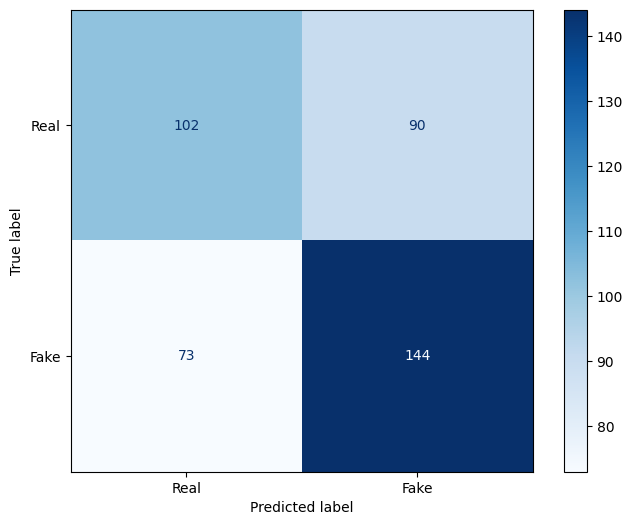

In [ ]:
Analysis(ADAMTrueLabels,ADAMPredictedLabels)

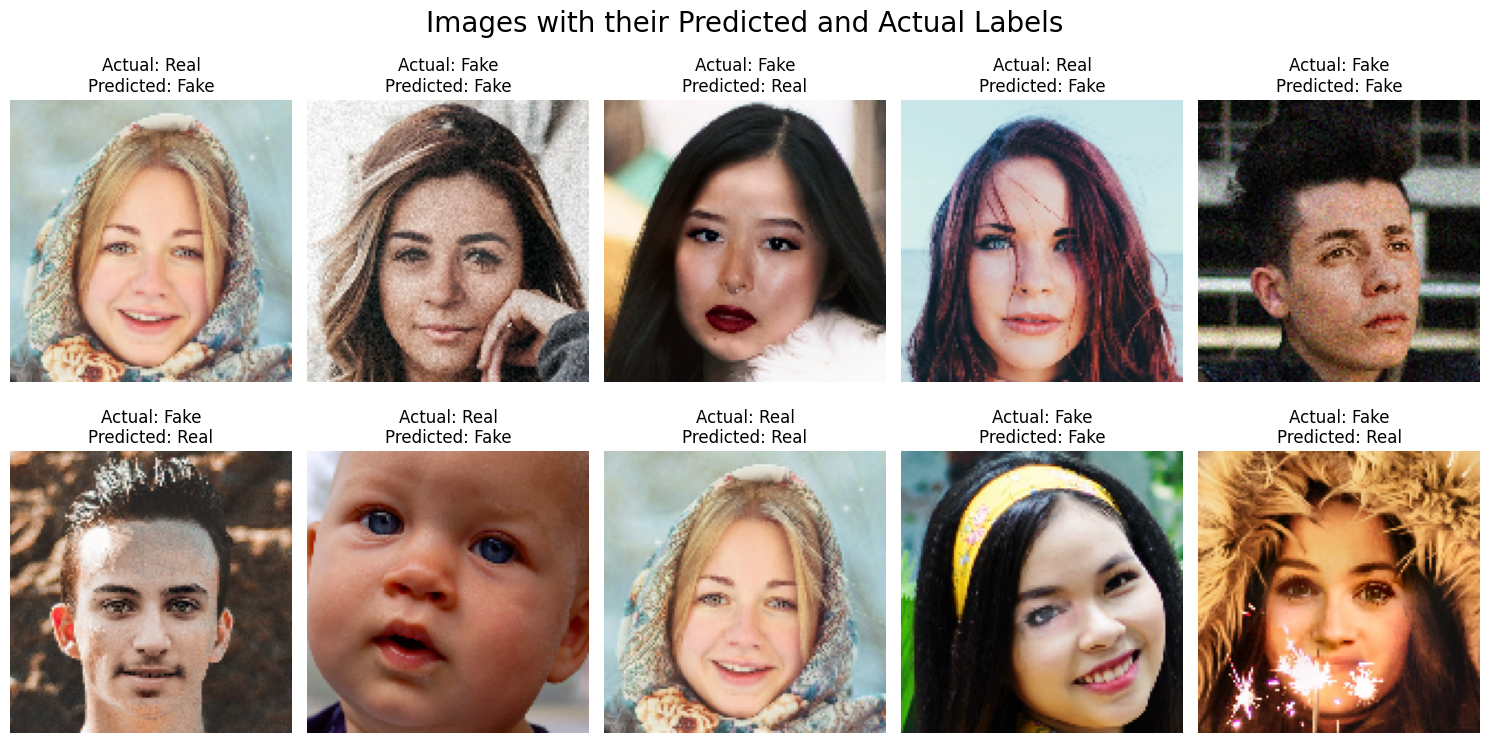

In [ ]:
VisualImages(SGDPredictedLabels)

# Test DinoV2 for SGD + ADAN

In [ ]:
from transformers import AutoImageProcessor, Dinov2Model
from PIL import Image
import torch
import numpy as np

def load_dinov2_model(model_name="facebook/dinov2-base", device='cuda' if torch.cuda.is_available() else 'cpu'):
    """load dinov2 model and image processor"""
    processor = AutoImageProcessor.from_pretrained(model_name)
    model = Dinov2Model.from_pretrained(model_name)
    model.eval()  # eval mode
    model.to(device)
    return processor, model, device

def extract_dinov2_features(image_path, processor, model, device):
    """extract dinov2 features"""
    # load and preprocess images
    image = Image.open(image_path).convert('RGB')
    inputs = processor(images=image, return_tensors="pt").to(device)

    # extract features
    with torch.no_grad():
        outputs = model(**inputs)
    # get[CLS] token features (dimension 768)
    features = outputs.last_hidden_state[:, 0, :].cpu().numpy()
    return features.flatten()  # returned datasets
def ProcessingImage_dinov2(path, processor, model, device):
    """extract image features with dinov2"""
    features = extract_dinov2_features(path, processor, model, device)
    return features

# load dinov2 model
processor, model, device = load_dinov2_model()

# extract image features with dinov2
MeregedDf['image'] = MeregedDf['Paths'].apply(lambda x: ProcessingImage_dinov2(x, processor, model, device))

# 80% train, 20% test
TrainDf, TestDf = train_test_split(MeregedDf, test_size=0.2, stratify=MeregedDf['Real'], random_state=123)

# stack feature vectors into train and test data
XTrain_dinov2 = np.vstack(TrainDf['image'].values).astype(np.float32)   # shapre is (n_samples, 768)
YTrain = TrainDf['Real'].values.astype(np.float32)
XTest_dinov2 = np.vstack(TestDf['image'].values)   # shape is (n_samples, 768)
YTest = TestDf['Real'].values

# change model infra to adjust dinov2 feature (input dimension 768)
def modelSGD_dinov2(input_dim=768):
    model = Sequential()
    model.add(Dense(256, activation='relu', kernel_initializer='he_uniform', input_shape=(input_dim,)))
    model.add(Dense(1, activation='sigmoid'))
    opt = SGD(learning_rate=0.0001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

def modelADAM_dinov2(input_dim=768):
    model = Sequential()
    model.add(Dense(256, activation='relu', kernel_initializer='he_uniform', input_shape=(input_dim,)))
    model.add(Dense(1, activation='sigmoid'))
    opt = Adam(learning_rate=0.0001)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# train sgd
modelSGD_dinov2 = modelSGD_dinov2(input_dim=XTrain_dinov2.shape[1])
modelSGD_dinov2.summary()
history_SGD_dinov2 = modelSGD_dinov2.fit(XTrain_dinov2, YTrain, epochs=20, batch_size=32, validation_data=(XTest_dinov2, YTest))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 256)                 │         196,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 197,121 (770.00 KB)

 Trainable params: 197,121 (770.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4772 - loss: 0.9628 - val_accuracy: 0.5232 - val_loss: 0.8236
Epoch 2/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5205 - loss: 0.8129 - val_accuracy: 0.5379 - val_loss: 0.7698
Epoch 3/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5644 - loss: 0.7428 - val_accuracy: 0.5452 - val_loss: 0.7412
Epoch 4/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5874 - loss: 0.7032 - val_accuracy: 0.5477 - val_loss: 0.7244
Epoch 5/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6229 - loss: 0.6729 - val_accuracy: 0.5575 - val_loss: 0.7152
Epoch 6/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6067 - loss: 0.6685 - val_accuracy: 0.5697 - val_loss: 0.7061
Epoch 7/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6313 - loss: 0.6663 - val_accuracy: 0.5746 - val_loss: 0.7003
Epoch 8/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6370 - loss: 0.6493 - val_accuracy: 0.5844 - val_loss

In [ ]:
modelADAM_dinov2 = modelADAM_dinov2()
modelADAM_dinov2.summary()
history_ADAM_dinov2 = modelADAM_dinov2.fit(XTrain_dinov2, YTrain_dinov2, epochs=20, batch_size=32, validation_data=(XTest_dinov2, YTest_dinov2))

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 256)                 │         196,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 197,121 (770.00 KB)

 Trainable params: 197,121 (770.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4832 - loss: 0.9680 - val_accuracy: 0.5623 - val_loss: 0.7994
Epoch 2/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6001 - loss: 0.6994 - val_accuracy: 0.5648 - val_loss: 0.7701
Epoch 3/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6855 - loss: 0.6101 - val_accuracy: 0.5795 - val_loss: 0.7433
Epoch 4/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7317 - loss: 0.5536 - val_accuracy: 0.5819 - val_loss: 0.7382
Epoch 5/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7527 - loss: 0.5140 - val_accuracy: 0.6112 - val_loss: 0.7138
Epoch 6/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7945 - loss: 0.4689 - val_accuracy: 0.6137 - val_loss: 0.7121
Epoch 7/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8387 - loss: 0.4336 - val_accuracy: 0.6284 - val_loss: 0.7088
Epoch 8/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8413 - loss: 0.4101 - val_accuracy: 0.6259 - val_loss

Using SGM + Dinov2
Cross Entropy Loss: 0.66
Validation Accuracy: 61.61%
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


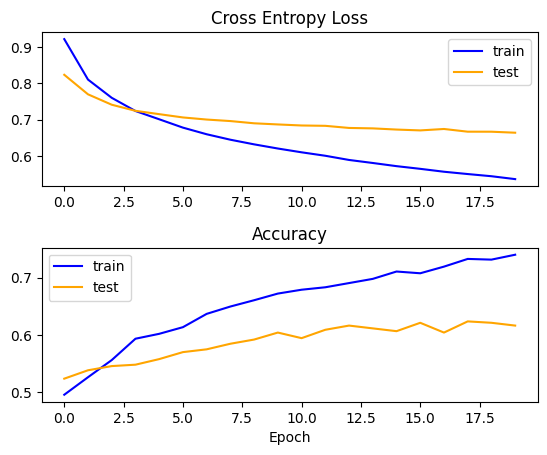

In [ ]:
print("Using SGD + Dinov2")
eval(history1, model1)
SGDPredictions = model1.predict(XTest)
SGDPredictedLabels = np.round(SGDPredictions).flatten().astype(int)
SGDTrueLabels = np.round(YTest).flatten().astype(int)

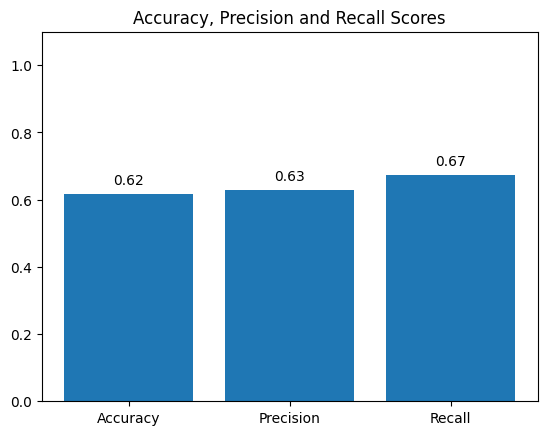

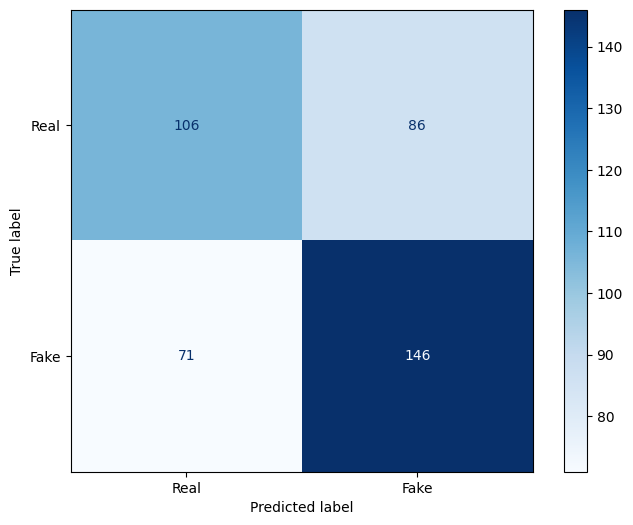

In [ ]:
Analysis(SGDTrueLabels,SGDPredictedLabels)

Using ADAM + Dinov2
Cross Entropy Loss: 0.71
Validation Accuracy: 65.77%
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


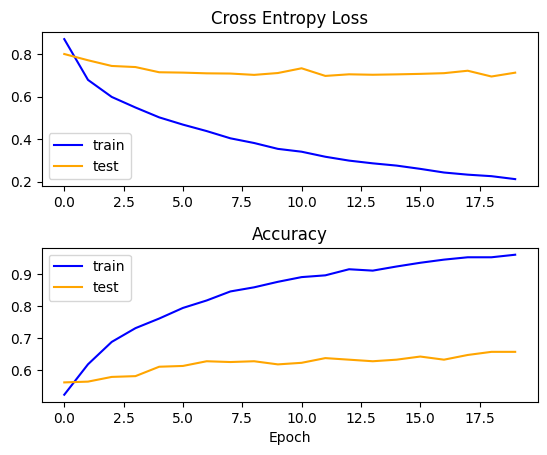

In [ ]:
print("Using ADAM + Dinov2")
eval(history2, model2)
ADAMPredictions = model1.predict(XTest)
ADAMPredictedLabels = np.round(ADAMPredictions).flatten().astype(int)
ADAMTrueLabels = np.round(YTest).flatten().astype(int)

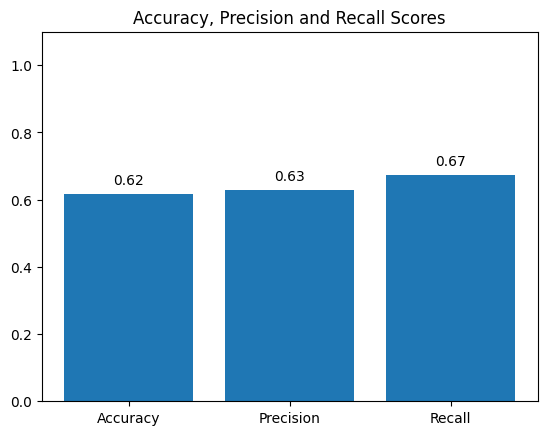

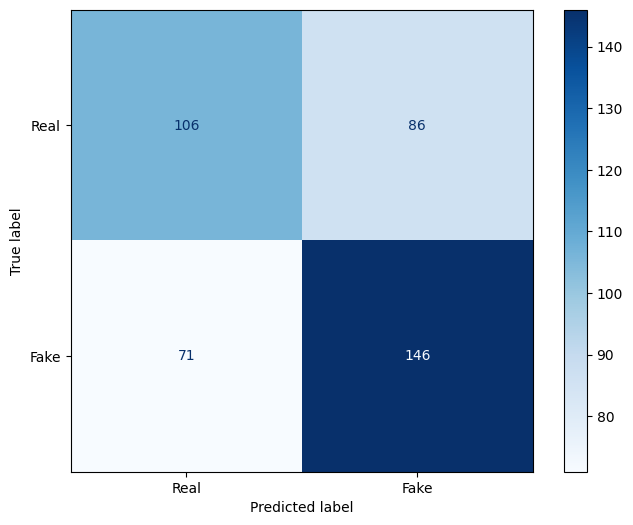

In [ ]:
Analysis(ADAMTrueLabels,ADAMPredictedLabels)